# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neural_network import MLPRegressor

In [2]:
RANDOM_STATE = 666

# Parte 3: Regresión

__Número de grupo: 5__

__Nombres de los estudiantes: Belén Sánchez Centeno y Martín Fernández de Diego__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

**Carga el fichero de datos `airbnb.csv` en un dataframe.**

In [3]:
airbnb = 'airbnb.csv'
dataframe = pd.read_csv(airbnb)
dataframe = dataframe.dropna()

In [4]:
dataframe

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


Tenemos una base de datos de 14998 alojamientos de la ciudad de Ámsterdam que cuentan con 14 variables diferenciadoras.

**Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables.**

In [5]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,14998.0,2.880317,1.298492,1.000000,2.000000,2.000000,4.000000,17.000000
bathrooms,14998.0,1.116215,0.343442,0.000000,1.000000,1.000000,1.000000,8.000000
bedrooms,14998.0,1.390919,0.839649,0.000000,1.000000,1.000000,2.000000,10.000000
guests_included,14998.0,1.499333,0.940643,1.000000,1.000000,1.000000,2.000000,16.000000
host_listings_count,14998.0,3.372316,11.203593,0.000000,1.000000,1.000000,1.000000,106.000000
latitude,14998.0,52.365312,0.015765,52.290308,52.355582,52.364960,52.374805,52.426224
longitude,14998.0,4.889033,0.035010,4.753513,4.864839,4.886370,4.907953,5.027689
minimum_nights,14998.0,2.885051,7.252271,1.000000,2.000000,2.000000,3.000000,523.000000
number_of_reviews,14998.0,17.797440,34.766613,0.000000,2.000000,7.000000,18.000000,496.000000
distance_centre,14998.0,2.998582,1.610995,0.115801,1.948924,2.841338,3.577086,11.842162


Estas variables son propiedades importantes a la hora de reservar un alojamiento.   
**`accommodates`**: Número de personas máximas para el alojamiento.  
**`bathrooms`**: Número de baños del alojamiento.  
**`bedrooms`**: Número de habitaciones del alojamiento.  
**`guests_included`**: Número de personas extras para el alojamiento (normalmente se permite un huésped adicional).  
**`host_listing_count`**: Número de veces que el alojamiento ha sido alquilado.  
**`latitude`** - **`longitude`**: Ubicación exacta del alojamiento en alquiler.  
**`minimun_nights`**: Mínimo número de noches que deben ser reservadas en el alojamiento.  
**`number_of_reviews`**: Número de valoraciones del alojamiento.  
**`distance_centre`**: Distancia al centro de la ciudad de Ámsterdam.  
**`instant_bookable`**: Variable *booleana* que nos dice si es posible reservar el alojamiento automáticamente o hay que esperar confirmación del dueño.  
**`entire_home`**: Variable *booleana* que nos dice si es posible reservar el alojamiento completo.  
**`private_room`**: Variable *booleana* que nos dice si, en el caso de no poder reservarse el alojamiento completo, la habitación es privada.  
**`shared_room`**: Variable *booleana* que nos dice si, en el caso de no poder reservarse el alojamiento completo, la habitación es compartida.  
**`price`**: Precio del alojamiento por día.

**Estudia la distribución de precios.**

<AxesSubplot:>

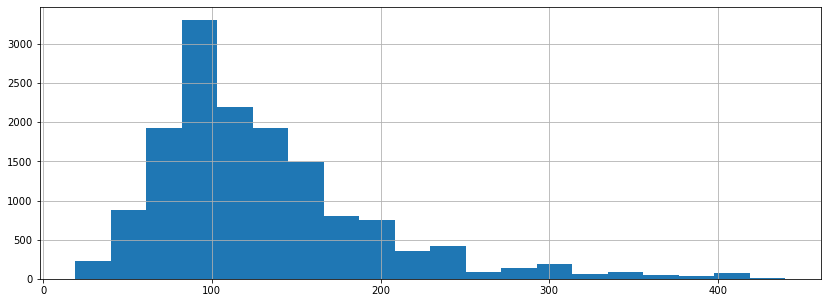

In [6]:
dataframe.price.hist(figsize=(14,5),bins=20)

<AxesSubplot:ylabel='Density'>

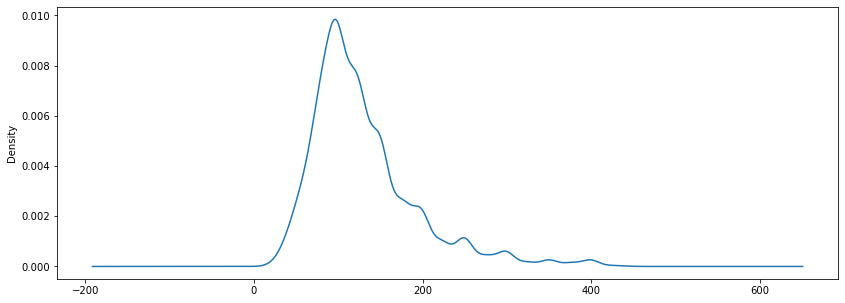

In [7]:
dataframe.price.plot.density(figsize=(14,5))

El grueso de los alojamientos en Ámsterdam tienen un precio de entre los 50€ y los 200€.

## 2) Selección de variables

**Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables.**

In [8]:
dataframe.corr(method='pearson')

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
accommodates,1.000000,0.342195,0.684226,0.495278,0.035877,0.019741,0.108009,0.008339,-0.031397,0.052256,0.001548,0.249384,-0.249088,-0.012872,0.552183
bathrooms,0.342195,1.000000,0.365951,0.228522,0.061330,0.014002,0.054273,0.008710,-0.030784,0.011396,0.019624,0.018378,-0.015951,-0.016196,0.283759
bedrooms,0.684226,0.365951,1.000000,0.397340,0.002439,0.002976,0.093538,0.028415,-0.096479,0.105061,-0.055236,0.242817,-0.239698,-0.030479,0.517237
guests_included,0.495278,0.228522,0.397340,1.000000,-0.027165,0.012679,0.067807,0.000536,0.063316,0.024110,-0.020698,0.123286,-0.120377,-0.023878,0.338739
host_listings_count,0.035877,0.061330,0.002439,-0.027165,1.000000,0.011374,0.007864,0.012551,-0.044428,-0.049033,0.205426,0.041292,-0.040185,-0.008841,0.109141
latitude,0.019741,0.014002,0.002976,0.012679,0.011374,1.000000,-0.130823,-0.008551,0.042507,-0.574523,0.018967,0.020318,-0.020974,0.003260,0.027922
longitude,0.108009,0.054273,0.093538,0.067807,0.007864,-0.130823,1.000000,0.008336,-0.010590,0.068103,0.030362,-0.007145,0.004975,0.014071,0.035887
minimum_nights,0.008339,0.008710,0.028415,0.000536,0.012551,-0.008551,0.008336,1.000000,-0.019435,0.000555,-0.019693,0.044669,-0.043631,-0.008554,0.007708
number_of_reviews,-0.031397,-0.030784,-0.096479,0.063316,-0.044428,0.042507,-0.010590,-0.019435,1.000000,-0.069880,0.081796,-0.261675,0.263597,-0.000648,-0.088437
distance_centre,0.052256,0.011396,0.105061,0.024110,-0.049033,-0.574523,0.068103,0.000555,-0.069880,1.000000,-0.006114,-0.092336,0.091778,0.007612,-0.204698


**Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).**

Las variables relacionadas con **`price`** por un valor de correlacción de al menos 0.2 son:  
**`accommodates`**, **`bathrooms`**, **`bedrooms`**, **`guests_included`**, **`distance_centre`**, **`entire_home`** y **`private_room`**.

In [9]:
dataframe_restricted = dataframe.loc[:,['accommodates','bathrooms','bedrooms','guests_included','distance_centre','entire_home','private_room','price']]

In [10]:
dataframe_restricted

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

**Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.**

**Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.**

In [11]:
dataframe_restricted.describe()

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,2.998582,0.777170,0.218562,130.050273
std,1.298492,0.343442,0.839649,0.940643,1.610995,0.416159,0.413285,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.115801,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.948924,1.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,2.841338,1.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,3.577086,1.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,11.842162,1.000000,1.000000,440.000000


Se observa que las variables no toman rangos de valores muy diferentes y, además, el perceptrón multicapa (MLP) con el que vamos a trabajar puede tratar variables sin normalizar.
Sin embargo, decidimos normalizar los datos para disminuir al máximo el tiempo de entrenamiento y evitar los “mínimos locales” en la optimización del error.
Los datos siguen una distribución normal así que los estandarizamos.

In [12]:
# Scaler para el array con la descripción de los pisos
scaler_data = StandardScaler()
scaler_data.fit(dataframe_restricted.drop('price', axis=1).values)
data_scaled = scaler_data.transform(dataframe_restricted.drop('price', axis=1).values)

# Scaler para el array con el precio
scaler_target = StandardScaler()
scaler_target.fit(dataframe_restricted['price'].values.reshape(-1, 1))
target_scaled = scaler_target.transform(dataframe_restricted['price'].values.reshape(-1, 1))

## 4) Entrenamiento y selección

**Crea dos redes neuronales de tipo Perceptrón Multicapa:**
- **La primera con una capa oculta de 200 neuronas**
- **La segunda con dos capas ocultas cada una de 100 neuronas**

- *Red 1* de tipo Perceptrón Multicapa con una capa oculta con 200 neuronas, función de activación ReLU, regularización L2, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs).

- *Red 2* de tipo Perceptrón Multicapa con dos capas ocultas con 100 neuronas cada una, función de activación ReLU, regularización L2, tamaño de mini-batch 100, tasa de aprendizaje 0.1, y máximo de 500 iteraciones a los datos (epochs).

**Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).**

In [13]:
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]

In [14]:
# Red 1:

cv_scores_mean_red1=[]
cv_scores_std_red1=[]

# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean_red1.append(scores.mean())
    cv_scores_std_red1.append(scores.std())

cv_scores_mean_red1, cv_scores_std_red1

([-0.499686741776853,
  -0.503286799157916,
  -0.5056759813821474,
  -0.5063059546177102,
  -0.5082615565185853,
  -0.5061189136746466],
 [0.018887353520437068,
  0.020668889423157522,
  0.01993398888880075,
  0.018555174076928842,
  0.021956520381981464,
  0.02005868952201885])

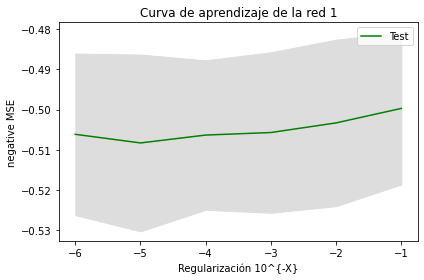

In [26]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean_red1, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit1 = np.array(cv_scores_mean_red1) - np.array(cv_scores_std_red1)
upper_limit1 = np.array(cv_scores_mean_red1) + np.array(cv_scores_std_red1)
plt.fill_between(np.log10(regul_param_range), lower_limit1, upper_limit1, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje de la red 1")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Para la red 1 elegiríamos 10^(-1) como parámetro de regularización ya que el error cuadratico medio (negativo) esta mas cercano a 1.

In [18]:
# Red 2:

cv_scores_mean_red2=[]
cv_scores_std_red2=[]

# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean_red2.append(scores.mean())
    cv_scores_std_red2.append(scores.std())

cv_scores_mean_red2, cv_scores_std_red2

([-0.5032546791914021,
  -0.5145344150676364,
  -0.5218434097732335,
  -0.5278478716788919,
  -0.5324537285581957,
  -0.5396351251042498],
 [0.020370572978353502,
  0.0221066853849183,
  0.018187276811836267,
  0.016813060834123098,
  0.017057943034188783,
  0.026726252499832615])

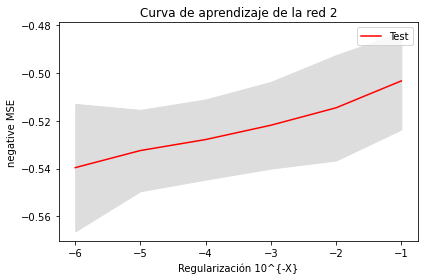

In [27]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean_red2, color="r", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit2 = np.array(cv_scores_mean_red2) - np.array(cv_scores_std_red2)
upper_limit2 = np.array(cv_scores_mean_red2) + np.array(cv_scores_std_red2)
plt.fill_between(np.log10(regul_param_range), lower_limit2, upper_limit2, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje de la red 2")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Para la red 2 también elegiríamos 10^(-1) como parámetro de regularización.

**¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?**

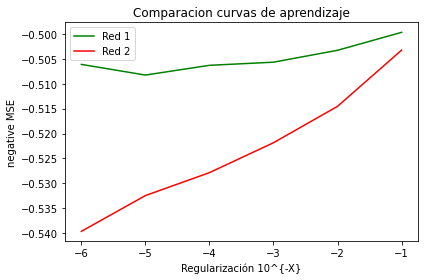

In [28]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean_red1, color="g", label="Red 1")
plt.plot(np.log10(regul_param_range), cv_scores_mean_red2, color="r", label="Red 2")

# Creamos el gráfico
plt.title("Comparacion curvas de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

La red 1, con una capa oculta de 200 neuronas, domina a la red 2, con 2 capas ocultas de 100 neuronas cada una, para todas las tasas de regulacion L2 que hemos probado.

## 5) Medición del error

**Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada.**

In [46]:
# Red 1 con parametro de regularizacion L2 = 0.1

# Creamos el clasificador
regul_param = 0.1
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, data_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts = scaler_target.inverse_transform(predicts_scaled)

**¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?**

In [49]:
errors = np.abs(dataframe_restricted['price'] - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(dataframe_restricted['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 31.514445101853063
Desviación típica: 32.17663195986543
Error medio en %: 24.2325096943437


En un rango de precios de entre 20 y 440 euros, hemos obtenido un error medio de 31,73 euros. Esto supone un error medio de casi el 25% del precio, por lo que no creemos que el modelo sea suficientemente bueno. 

**Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?**

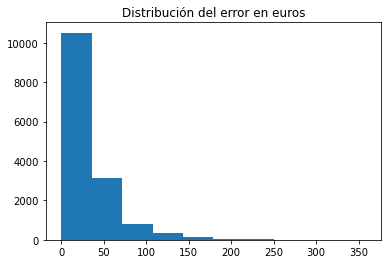

In [50]:
# Dibujamos el histograma de los errores
fig = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en euros')
plt.show()

La mayoria de las veces el error es menor a 50 euros, pero hay algunos de hasta 250 euros, mucho mas de la media de lo que cuesta un Airbnb.

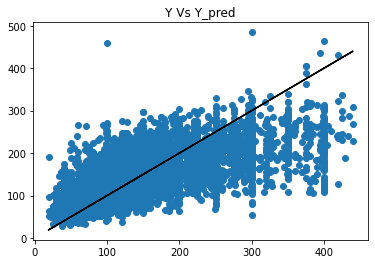

In [51]:
fig = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(dataframe_restricted['price'], predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(dataframe_restricted['price'], dataframe_restricted['price'], color='k') 

plt.title('Y Vs Y_pred')
plt.show()

En el diagrama de dispersión se puede ver que no se cometen los mismos errores para todos los precios de Airbnb. A partir de los 250 euros se produce una infravaloración muy importante de los precios, lo que se debe a que la mayoria de alojamientos con los que se ha entrenado el modelo son más baratos. Esto se podría solucionar equilibrando la cantidad de Airbnb que hay de cada precio, de forma que el error total de la mayoría (los más baratos) no reste importancia al error de este tipo de Airbnb más caros. Dado que esto podría ser dificil debido a que este tipo de alojamientos es más exclusivo y menos numeroso, otra opcián sería dividir por precio en dos redes neuronales diferentes.